In [1]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd


In [34]:
score_field = "xray_0+xray_1"
rmsd_field = "rmsd_0+rmsd_1"

score_dfs = list()
for i in range(10):
    job_dir = Path(Path.home(), "Documents/xray/score_bench/data/7mhf/121_native_decoys")

    score_file = Path(job_dir, "rand1000_{}.csv".format(i))

    score_df = pd.read_csv(score_file, index_col=0)
    score_df["xray_0+xray_1"] = score_df["xray_0"] + score_df["xray_1"]
    score_df["rmsd_0+rmsd_1"] = score_df["rmsd_0"] + score_df["rmsd_1"]
    score_dfs.append(score_df)

score_dfs[0].head()

,ff,rmsd_0,rmsd_1,w_0_0,w_1_0,w_0_1,w_1_1,pdb,xray_0,r_free_0,xray_1,r_free_1,xray_0+xray_1,rmsd_0+rmsd_1
0,1094.191205,0.233132,0.355285,0.409869,0.590131,0.288601,0.711399,/wynton/group/sali/mhancock/xray/sample_bench/...,5.719594,0.249618,5.880792,0.292137,11.600386,0.588417
1,21516.401322,0.060163,0.180684,0.526350,0.473650,0.700749,0.299251,/wynton/group/sali/mhancock/xray/sample_bench/...,4.550931,0.066961,5.235180,0.140058,9.786111,0.240848
2,1742.458856,0.809924,0.853567,0.420897,0.579103,0.215034,0.784966,/wynton/group/sali/mhancock/xray/sample_bench/...,6.296135,0.477383,6.354656,0.478607,12.650791,1.663491
3,2698.740329,0.833084,0.789501,0.838902,0.161098,0.658923,0.341077,/wynton/group/sali/mhancock/xray/sample_bench/...,6.375942,0.473619,6.311935,0.455033,12.687877,1.622585
4,4359.688834,0.163741,0.355054,0.567668,0.432332,0.272126,0.727874,/wynton/group/sali/mhancock/xray/sample_bench/...,5.381237,0.164760,5.794378,0.265658,11.175616,0.518795


In [35]:
natives_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/29_synthetic_native_3/data/scores/7mhf_30.csv"), index_col=0)
natives_df["xray_0+xray_1"] = natives_df["xray_0"] + natives_df["xray_1"]
natives_df["rmsd_0+rmsd_1"] = natives_df["rmsd_0"] + natives_df["rmsd_1"]

natives_df.head()

,pdb,w_0_0,w_1_0,w_0_1,w_1_1,xray_0,r_free_0,rmsd_0,ff,xray_1,r_free_1,rmsd_1,xray_0+xray_1,rmsd_0+rmsd_1
0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.510588,0.489412,0.555566,0.444434,4.025633,0.039276,0.0,21250.054492,4.053322,0.043427,0.0,8.078955,0.0
1,/wynton/group/sali/mhancock/xray/sample_bench/...,0.893325,0.106675,0.739213,0.260787,4.227168,0.040899,0.0,20682.124765,4.121057,0.041334,0.0,8.348225,0.0
2,/wynton/group/sali/mhancock/xray/sample_bench/...,0.585996,0.414004,0.582210,0.417790,4.054030,0.040999,0.0,20822.373139,4.048832,0.040720,0.0,8.102862,0.0
3,/wynton/group/sali/mhancock/xray/sample_bench/...,0.375460,0.624540,0.297137,0.702863,4.064986,0.041624,0.0,21136.167610,4.103359,0.040295,0.0,8.168346,0.0
4,/wynton/group/sali/mhancock/xray/sample_bench/...,0.303720,0.696280,0.357188,0.642812,4.093771,0.041402,0.0,20683.275695,4.082613,0.040715,0.0,8.176383,0.0


In [36]:
all_score_dfs = score_dfs.copy()
all_score_dfs.append(natives_df)
all_score_df = pd.concat(all_score_dfs)

# all_score_df = all_score_df.loc[all_score_df["xray_0"]<7]

all_score_df.head()


,ff,rmsd_0,rmsd_1,w_0_0,w_1_0,w_0_1,w_1_1,pdb,xray_0,r_free_0,xray_1,r_free_1,xray_0+xray_1,rmsd_0+rmsd_1
0,1094.191205,0.233132,0.355285,0.409869,0.590131,0.288601,0.711399,/wynton/group/sali/mhancock/xray/sample_bench/...,5.719594,0.249618,5.880792,0.292137,11.600386,0.588417
1,21516.401322,0.060163,0.180684,0.526350,0.473650,0.700749,0.299251,/wynton/group/sali/mhancock/xray/sample_bench/...,4.550931,0.066961,5.235180,0.140058,9.786111,0.240848
2,1742.458856,0.809924,0.853567,0.420897,0.579103,0.215034,0.784966,/wynton/group/sali/mhancock/xray/sample_bench/...,6.296135,0.477383,6.354656,0.478607,12.650791,1.663491
3,2698.740329,0.833084,0.789501,0.838902,0.161098,0.658923,0.341077,/wynton/group/sali/mhancock/xray/sample_bench/...,6.375942,0.473619,6.311935,0.455033,12.687877,1.622585
4,4359.688834,0.163741,0.355054,0.567668,0.432332,0.272126,0.727874,/wynton/group/sali/mhancock/xray/sample_bench/...,5.381237,0.164760,5.794378,0.265658,11.175616,0.518795


In [37]:

x_min = all_score_df[rmsd_field].min()
x_max = all_score_df[rmsd_field].max()

y_min = all_score_df[score_field].min()
y_max = all_score_df[score_field].max()
y_pad = (y_max - y_min) * 0.1


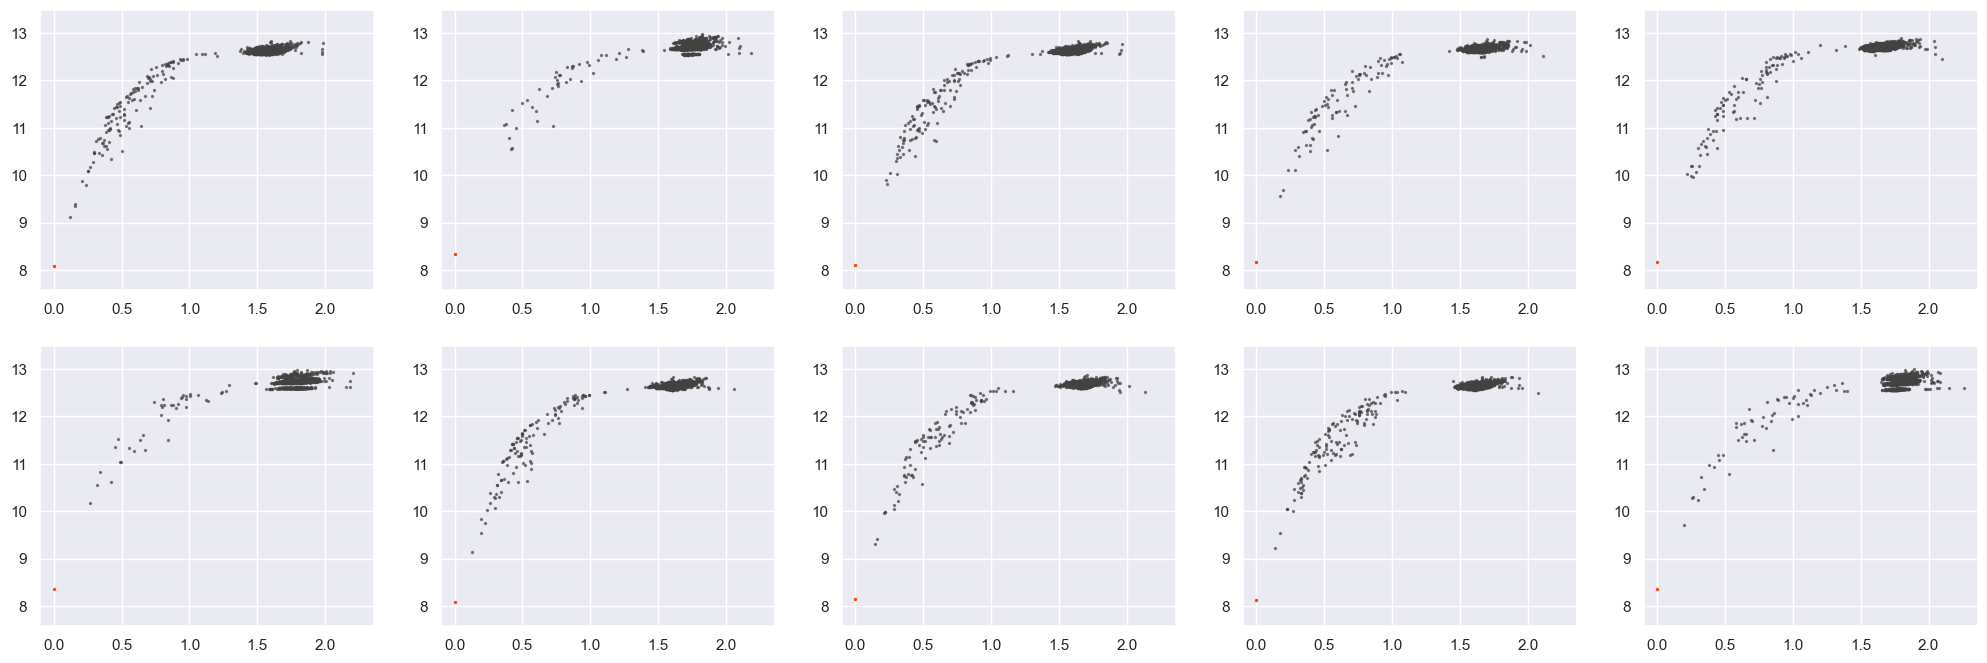

In [38]:

colors = list()
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha_off = .2
alpha_on = .6

fig_file = Path(Path.home(), "Desktop/score_rmsd_correlation.png")
fig, axs = plt.subplots(2, 5, figsize=(25,8))

for i in range(10):
    ax = axs[i//5][i%5]
    ax.set_xlim(-.1,x_max+.1)
    ax.set_ylim(y_min-y_pad,y_max+y_pad)
    # ax.set_ylim(4, 7)

    ax.scatter(score_dfs[i][rmsd_field], score_dfs[i][score_field], c="#424242ff", s=2, alpha=alpha_on)
    ax.scatter(natives_df.loc[i][rmsd_field], natives_df.loc[i][score_field], s=2, c=colors[2])

    # ax.set_ylim(score_min-.25,score_max+.25)
    # ax.scatter(score_dfs[i]["rmsd_avg_0"], score_dfs[i]["xray_0"]+score_dfs[i]["xray_1"], c=colors[0], alpha=alpha_on)
    # ax.scatter(natives_df.loc[i]["rmsd_avg_0"], natives_df.loc[i]["xray_0"]+natives_df.loc[i]["xray_1"], c=colors[2])

    # ax.set_ylim(0,.1)
    # ax.scatter(score_dfs[i]["rmsd_avg_0"], score_dfs[i]["r_free_0"], c=colors[0], alpha=alpha_on)
    # ax.scatter(natives_df.loc[i]["rmsd_avg_0"], natives_df.loc[i]["r_free_0"], c=colors[2])

# plt.show()
plt.savefig(fig_file)


In [31]:
plt.savefig(fig_file)

<Figure size 640x480 with 0 Axes>

In [2]:
decoy_df = pd.read_csv(Path(Path.home(), "Documents/xray/score_bench/data/7mhf/122_native_decoys_1_state/rand1000_0.csv"))
decoy_df.head()

,Unnamed: 0,ff,rmsd_0,w_0_0,pdb,xray_0,r_free_0
0,0,-26.540822,0.401842,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.256810,0.375310
1,1,-80.661593,0.458946,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.319091,0.406422
2,2,14.050264,0.388962,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.227150,0.361001
3,3,13.947927,0.388693,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.226858,0.360360
4,4,-50.855343,0.418448,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.280882,0.389438


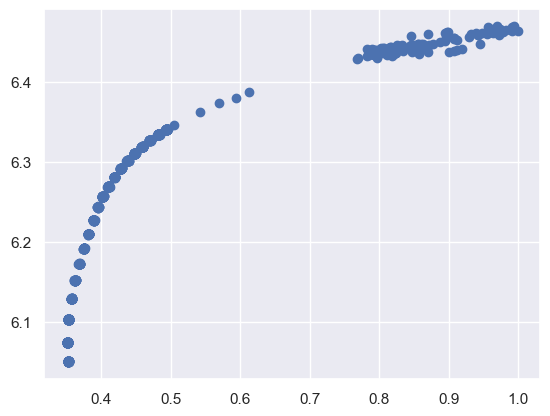

In [3]:
plt.scatter(decoy_df["rmsd_0"], decoy_df["xray_0"])